In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,sms or WA,7,14400000,35700000,277706,40.0
1,11,panggilan,35,79000000,160500000,22382611,49.0
2,4,sms or WA,6,7100000,26700000,205389,27.0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0


In [5]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

y = df["time_to_collect"]
df.drop("time_to_collect", axis=1, inplace=True)             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,avg_bill_methods
0,-1.347826,-0.459398,-0.520698,-0.252668,-0.363636,0
1,-0.130435,-0.282327,-0.344973,-0.162494,-0.159091,2
2,-1.391304,-0.479408,-0.533371,-0.252963,-0.659091,0
3,1.086957,1.644624,1.393270,1.716301,0.000000,3
4,-0.130435,0.449531,0.112644,0.362330,0.340909,3


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [7]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 8.87
      Mean Absolute Error : 2.33
      Mean Absolute Percentage Error : 193481405465258.53
      Root Mean Squared Error : 193481405465258.53
      R_Squared : 0.88
      


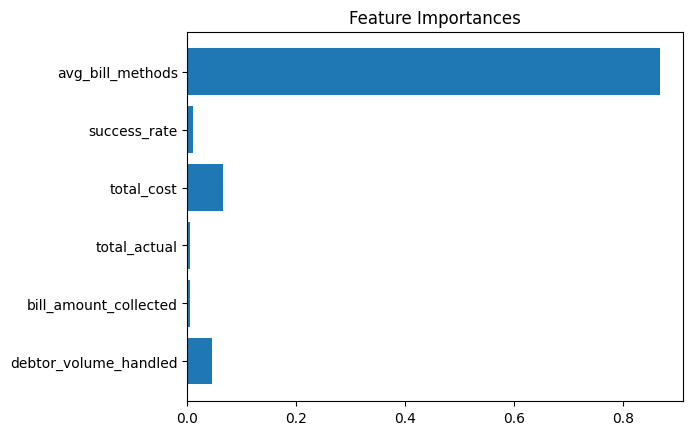

In [9]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.show()

In [10]:
model = AdaBoostRegressor(DecisionTreeRegressor())
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor())

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 11.96
      Mean Absolute Error : 2.67
      Mean Absolute Percentage Error : 202661983231672.56
      Root Mean Squared Error : 202661983231672.56
      R_Squared : 0.84
      


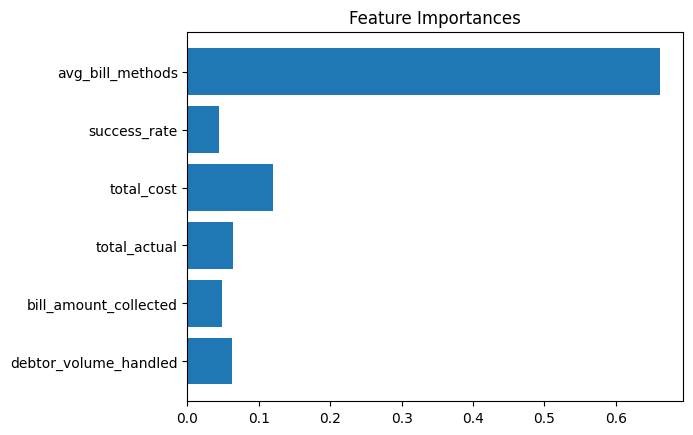

In [12]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.show()

In [13]:
import pickle

pickle.dump(model, open("adaboost.pkl", "wb"))

In [14]:
df3 = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [15]:
negotiation_skills = []
collector_experience = []
for i in range(len(df3)):
    if df3.loc[i, "success_rate"] >= 60 and df3.loc[i, "debtor_volume_handled"] >= 15 and df3.loc[i, "time_to_collect"] <= 15:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif df3.loc[i, "success_rate"] >= 60 and df3.loc[i, "debtor_volume_handled"] >= 15 and df3.loc[i, "time_to_collect"] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df3.loc[i, "success_rate"] >= 60 and df3.loc[i, "debtor_volume_handled"] < 15 and df3.loc[i, "time_to_collect"] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    elif df3.loc[i, "success_rate"] >= 40 and df3.loc[i, "debtor_volume_handled"] < 15 and df3.loc[i, "time_to_collect"] > 10:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df3.loc[i, "success_rate"] >= 40 and df3.loc[i, "debtor_volume_handled"] >= 15 and df3.loc[i, "time_to_collect"] > 15:
        collector_experience.append(np.random.randint(2, 3))
        negotiation_skills.append("Cukup baik")
    elif df3.loc[i, "success_rate"] >= 40 and df3.loc[i, "debtor_volume_handled"] < 15 and df3.loc[i, "time_to_collect"] <= 10:
        collector_experience.append(np.random.randint(4, 5))
        negotiation_skills.append("Baik")
    else:
        collector_experience.append(np.random.randint(0, 1))
        negotiation_skills.append("Buruk")

df3["negotiation_skills"] = negotiation_skills
df3["collector_experience"] = collector_experience
df3.head()

,Unnamed: 0,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,negotiation_skills,collector_experience
0,0,0,sms or WA,7,14400000,35700000,277706,40.0,Baik,4
1,1,11,panggilan,35,79000000,160500000,22382611,49.0,Buruk,0
2,2,4,sms or WA,6,7100000,26700000,205389,27.0,Buruk,0
3,3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,Cukup baik,2
4,4,22,datang ke tempat,35,346000000,485500000,151035603,71.0,Cukup baik,2


In [16]:
for i in df3.columns:
    if df3[i].dtype == "object":
        df3[i] = df3[i].astype("category")

df3.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
df3.to_csv("./data/kolektor.csv")

In [18]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
nego = {"Buruk": 0, "Cukup baik": 1, "Baik": 2}
columns = {"avg_bill_methods": bill_methods, "negotiation_skills": nego}
for i in df3.columns:
    if df3[i].dtype == "category" or df3[i].dtype == "object":
        df3[i] = [columns[i][j] for j in df3[i]]

y = df3["time_to_collect"]
df3.drop("time_to_collect", axis=1, inplace=True)             
scaler = RobustScaler().fit(df3[[i for i in df3.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df3[[i for i in df3.columns if i not in columns]]), columns=df3[[i for i in df3.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df3[i]
df2.head(5)

,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_experience,avg_bill_methods,negotiation_skills
0,-1.347826,-0.459398,-0.520698,-0.252668,-0.363636,0.5,0,2
1,-0.130435,-0.282327,-0.344973,-0.162494,-0.159091,-0.5,2,0
2,-1.391304,-0.479408,-0.533371,-0.252963,-0.659091,-0.5,0,0
3,1.086957,1.644624,1.393270,1.716301,0.000000,0.0,3,1
4,-0.130435,0.449531,0.112644,0.362330,0.340909,0.0,3,1


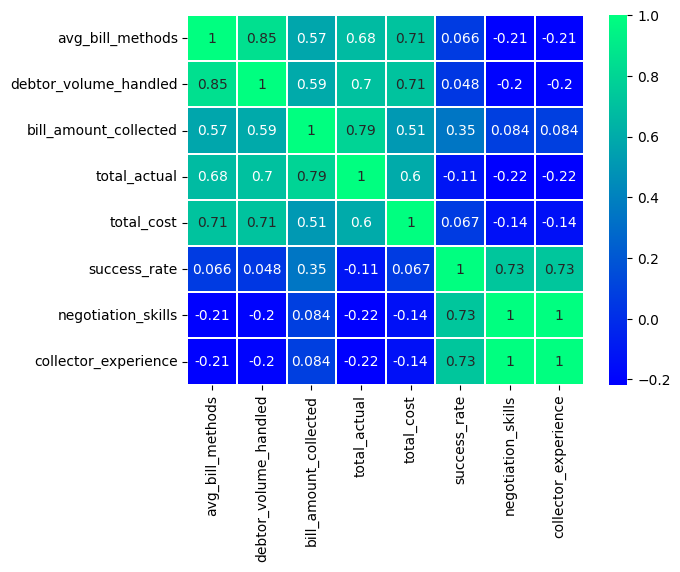

In [19]:
sns.heatmap(df3.corr(), annot=True, linecolor="white", linewidths=.2, cmap="winter")
plt.show()

In [20]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [21]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.20
      Mean Absolute Error : 2.36
      Mean Absolute Percentage Error : 210443299190160.16
      Root Mean Squared Error : 210443299190160.16
      R_Squared : 0.87
      
